In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Get_groups import phase_diagram,make_meanr

from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm
from scipy.signal import find_peaks
import parmap

In [8]:
df  = pd.read_csv('Km ver 1, m = 0to10,K= 0to10, 0.1.csv',index_col=[0,1])
df2 = pd.read_csv('Km ver 4, m = 0to10,K= 0to10, 0.2,0.2.csv',index_col=[0,1])
df3 = pd.read_csv('Km ver 5, m = 0to10,K= 0to10, 0.2,0.2.csv',index_col=[0,1])
df4 = pd.read_csv('Km ver 5, m = 0to10,K= 0to10, 0.2,0.2,seed=10,B.csv',index_col=[0,1])

In [9]:
Ks2 = np.arange(0,10,0.2)
ms2 = np.arange(0,10,0.2)
KK2,MM2 = np.meshgrid(Ks2,ms2)

Ks = np.linspace(0,10,101)
ms = np.linspace(0,10,101)
KK,MM = np.meshgrid(Ks,ms)

Ks3 = np.linspace(0,10,51)
ms3 = np.linspace(0,10,51)
KK3,MM3 = np.meshgrid(Ks3,ms3)

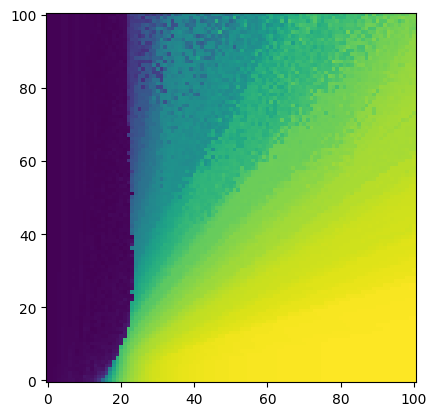

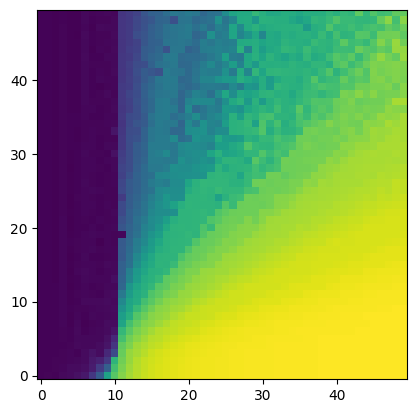

In [10]:
plt.imshow(df.unstack().r.to_numpy().T,origin='lower')
plt.figure()
plt.imshow(df2.unstack().r.to_numpy().T,origin='lower')

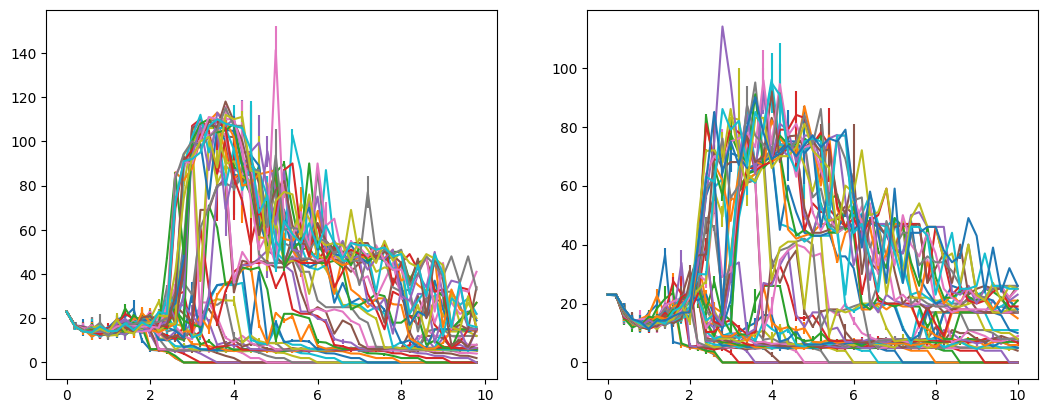

In [11]:
plt.figure(figsize=(12.8,4.8))
plt.subplot(121)
for i,m in enumerate(ms2):
    plt.errorbar(Ks2,df2.unstack().g2.to_numpy().T[i],df2.unstack().g2_std.to_numpy().T[i])
    # plt.plot(Ks2,df2.unstack().r.to_numpy().T[i],'.-')
plt.subplot(122)
for i,m in enumerate(ms[::2]):
    plt.errorbar(Ks[::2],df.unstack().g2.to_numpy()[::2,::2].T[i],df.unstack().g2_std.to_numpy()[::2,::2].T[i])
    # plt.plot(Ks[::2],df.unstack().r.to_numpy()[::2,::2].T[i],'.-')


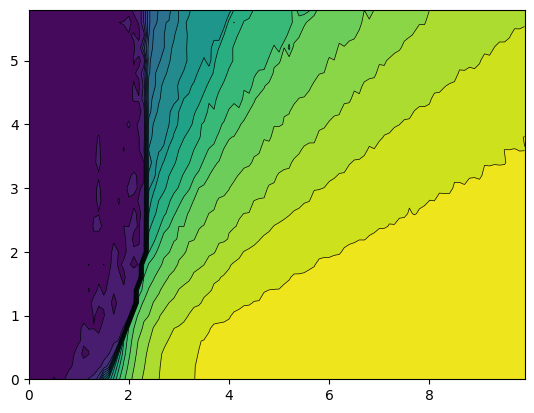

In [ ]:
origin = 'lower'
CS = plt.contourf(KK,MM,r, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)

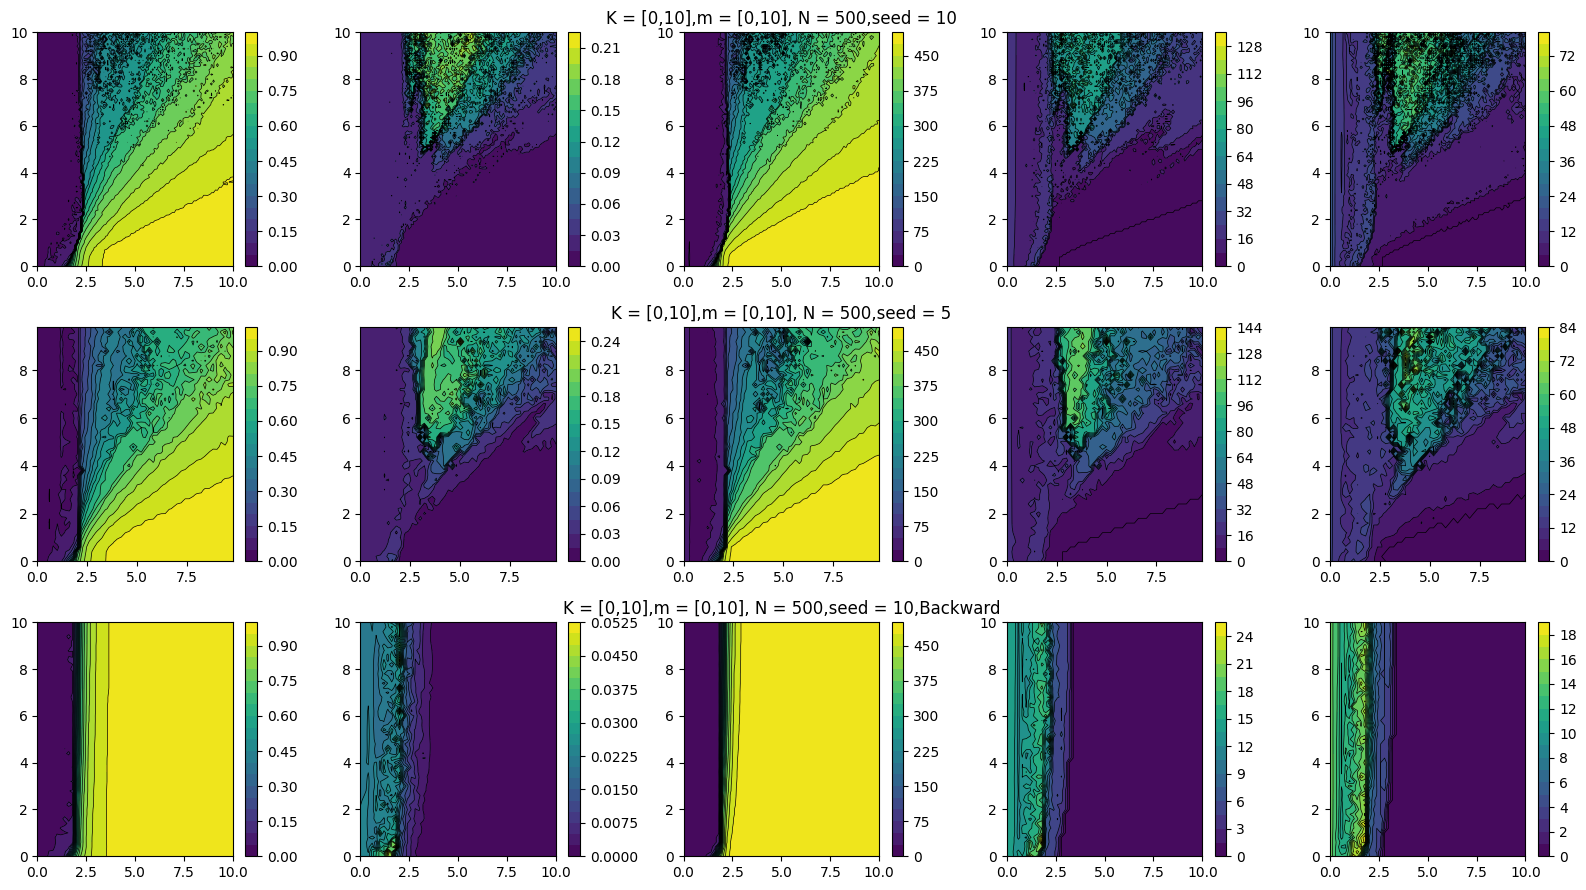

In [19]:
origin = 'lower'
fig = plt.figure(figsize=(16,9))
plt.subplot(351)
CS = plt.contourf(KK,MM,df.unstack().r.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(352)
CS = plt.contourf(KK,MM,df.unstack().rstd.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(353)
CS = plt.contourf(KK,MM,df.unstack().g1.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)
plt.title(f'K = [0,10],m = [0,10], N = 500,seed = 10')

plt.subplot(354)
CS = plt.contourf(KK,MM,df.unstack().g2.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(355)
CS = plt.contourf(KK,MM,df.unstack().g3.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)


plt.subplot(356)
CS = plt.contourf(KK2,MM2,df2.unstack().r.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(357)
CS = plt.contourf(KK2,MM2,df2.unstack().rstd.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(358)
CS = plt.contourf(KK2,MM2,df2.unstack().g1.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)
plt.title(f'K = [0,10],m = [0,10], N = 500,seed = 5')

plt.subplot(359)
CS = plt.contourf(KK2,MM2,df2.unstack().g2.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(3,5,10)
CS = plt.contourf(KK2,MM2,df2.unstack().g3.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(3,5,11)
CS = plt.contourf(KK3,MM3,df4.unstack().r.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(3,5,12)
CS = plt.contourf(KK3,MM3,df4.unstack().rstd.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(3,5,13)
CS = plt.contourf(KK3,MM3,df4.unstack().g1.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)
plt.title(f'K = [0,10],m = [0,10], N = 500,seed = 10,Backward')

plt.subplot(3,5,14)
CS = plt.contourf(KK3,MM3,df4.unstack().g2.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(3,5,15)
CS = plt.contourf(KK3,MM3,df4.unstack().g3.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)
plt.tight_layout()

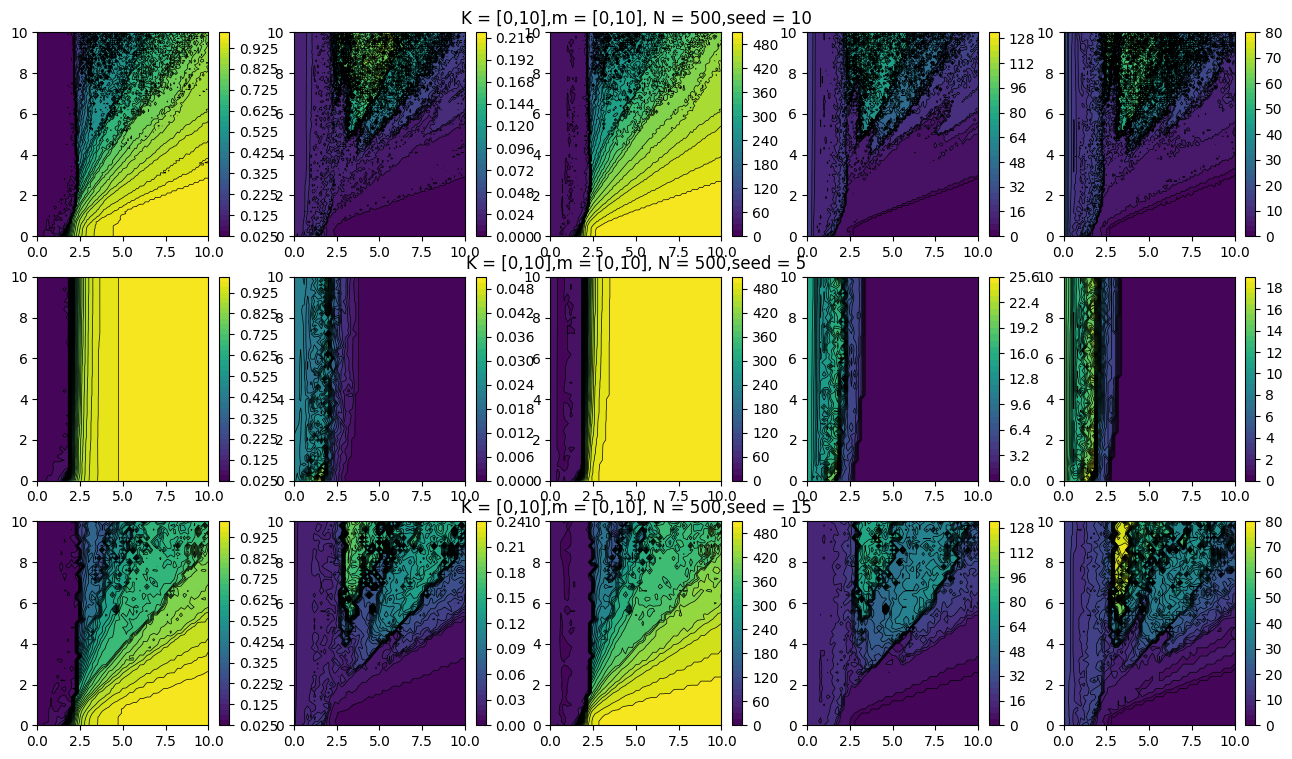

In [21]:
origin = 'lower'
fig = plt.figure(figsize=(16,9))
plt.subplot(351)
CS = plt.contourf(KK,MM,df.unstack().r.to_numpy().T, 40, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(352)
CS = plt.contourf(KK,MM,df.unstack().rstd.to_numpy().T, 40, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(353)
CS = plt.contourf(KK,MM,df.unstack().g1.to_numpy().T, 40, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)
plt.title(f'K = [0,10],m = [0,10], N = 500,seed = 10')

plt.subplot(354)
CS = plt.contourf(KK,MM,df.unstack().g2.to_numpy().T, 40, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(355)
CS = plt.contourf(KK,MM,df.unstack().g3.to_numpy().T, 40, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)


plt.subplot(356)
CS = plt.contourf(KK3,MM3,df4.unstack().r.to_numpy().T, 40, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(357)
CS = plt.contourf(KK3,MM3,df4.unstack().rstd.to_numpy().T, 40, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(358)
CS = plt.contourf(KK3,MM3,df4.unstack().g1.to_numpy().T, 40, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)
plt.title(f'K = [0,10],m = [0,10], N = 500,seed = 5')

plt.subplot(359)
CS = plt.contourf(KK3,MM3,df4.unstack().g2.to_numpy().T, 40, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(3,5,10)
CS = plt.contourf(KK3,MM3,df4.unstack().g3.to_numpy().T, 40, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(3,5,11)
CS = plt.contourf(KK3,MM3,df3.unstack().r.to_numpy().T, 40, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(3,5,12)
CS = plt.contourf(KK3,MM3,df3.unstack().rstd.to_numpy().T, 40, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(3,5,13)
CS = plt.contourf(KK3,MM3,df3.unstack().g1.to_numpy().T, 40, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)
plt.title(f'K = [0,10],m = [0,10], N = 500,seed = 15')

plt.subplot(3,5,14)
CS = plt.contourf(KK3,MM3,df3.unstack().g2.to_numpy().T, 40, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

plt.subplot(3,5,15)
CS = plt.contourf(KK3,MM3,df3.unstack().g3.to_numpy().T, 40, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

<a list of 21 text.Text objects>

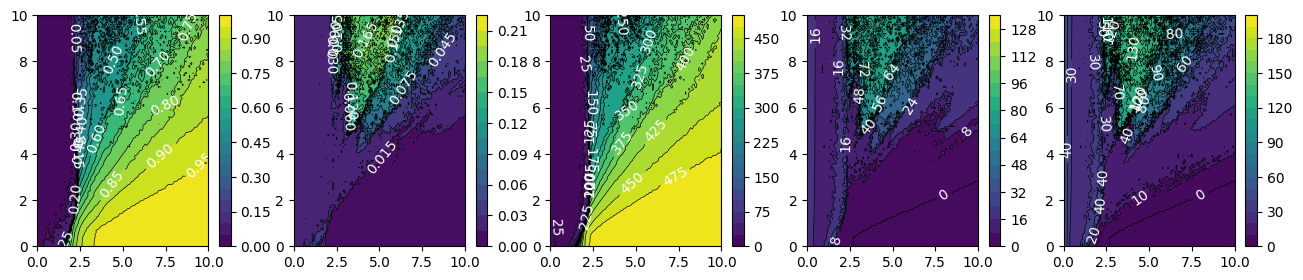

In [37]:
origin = 'lower'
fig = plt.figure(figsize=(16,3))
plt.subplot(151)
CS = plt.contourf(KK,MM,df.unstack().r.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)
plt.clabel(CS2, inline=1, fontsize=10,colors='white')

# plt.xlim(1,3)

plt.subplot(152)
CS = plt.contourf(KK,MM,df.unstack().rstd.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)
plt.clabel(CS2, inline=1, fontsize=10,colors='white')

# plt.xlim(1,3)

plt.subplot(153)
CS = plt.contourf(KK,MM,df.unstack().g1.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)
plt.clabel(CS2, inline=1, fontsize=10,colors='white')

# plt.xlim(1,3)

plt.subplot(154)
CS = plt.contourf(KK,MM,df.unstack().g2.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)
plt.clabel(CS2, inline=1, fontsize=10,colors='white')

# plt.xlim(1,3)

plt.subplot(155)
CS = plt.contourf(KK,MM,df.unstack().g3.to_numpy().T+df.unstack().g2.to_numpy().T, 20, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)
plt.clabel(CS2, inline=1, fontsize=10,colors='white')

# plt.xlim(1,3)


In [10]:
index = df2[df2.g1_std>1].index
df2.loc[index,'g1'] = np.nan

index = df2[df2.g2_std>1].index
df2.loc[index,'g2'] = np.nan

index = df2[df2.g3_std>1].index
df2.loc[index,'g3'] = np.nan

index = df2[df2.g4_std>1].index
df2.loc[index,'g4'] = np.nan

In [49]:
seed =10
N = 500
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega)
m = 8
t = np.arange(0,3000,0.1)
K = 3.5
theta, dtheta,rs = mK((m,K),N=N,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)

In [50]:
n = len(t)
k = np.arange(n)
Fs = 1/0.001; T = n/Fs
freq = k/T 

In [51]:
def draw_stft(f, t, Zxx):
    plt.figure(figsize=(12,5))
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=0.1, shading='gouraud')
    plt.title('STFT Magnitude'); plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]'); plt.ylim([0, 20]); plt.show()

In [52]:
from scipy import signal

def calc_stft(nperseg,r):
    f, t, Zxx = signal.stft(r, Fs, nperseg=nperseg)
    draw_stft(f, t, Zxx)

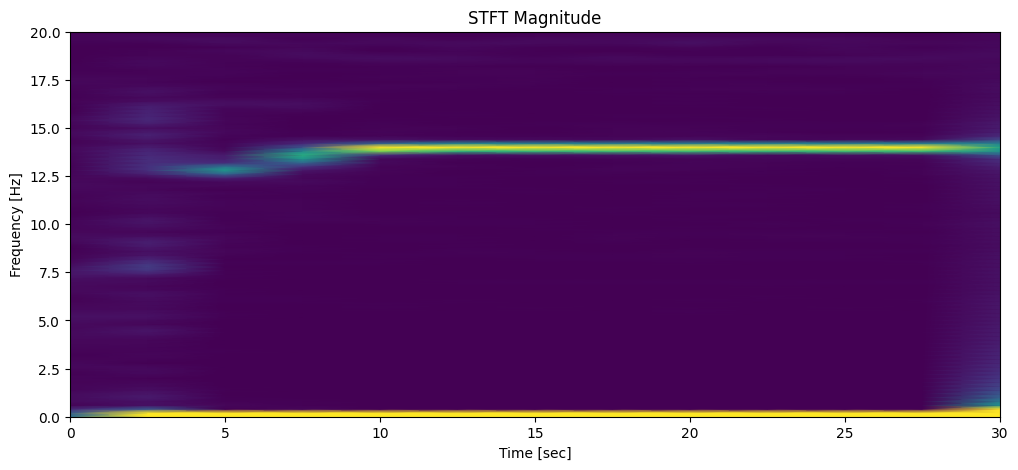

In [53]:
calc_stft(5000,rs)

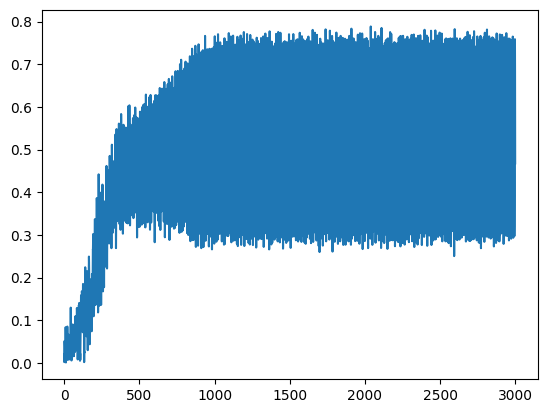

In [54]:
plt.plot(t,rs)

In [59]:
sum_dtheta = np.cumsum(dtheta,axis=1)

In [61]:
sum_time = 500
dtheta_c = np.cumsum(dtheta,axis=0)
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

C:\Users\kim9y\AppData\Local\Temp\ipykernel_40988\1800038490.py:13: UserWarning: The following kwargs were not used by contour: 'linewidth'
  C = plt.contour(CS,levels=CS.levels, colors='black', linewidth=.5)


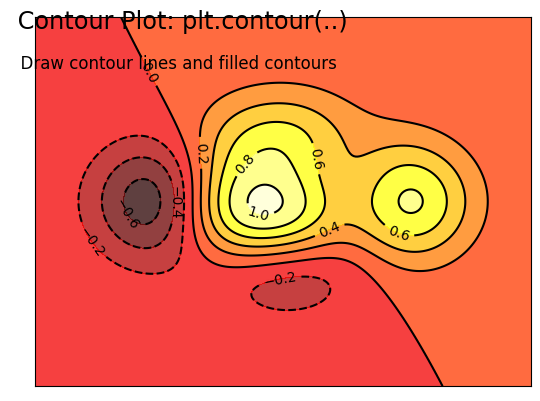

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)

CS = plt.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap=plt.cm.hot)
C = plt.contour(CS,levels=CS.levels, colors='black', linewidth=.5)
plt.clabel(C, inline=1, fontsize=10)
plt.xticks([])
plt.yticks([])


# Add a title and a box around it
from matplotlib.patches import FancyBboxPatch
ax = plt.gca()
# ax.add_patch(FancyBboxPatch((-0.05, .87),
#                             width=.66, height=.165, clip_on=False,
#                             boxstyle="square,pad=0", zorder=3,
#                             facecolor='white', alpha=1.0,
#                             transform=plt.gca().transAxes))

plt.text(-0.05, 1.02, " Contour Plot: plt.contour(..)\n",
      horizontalalignment='left',
      verticalalignment='top',
      size='xx-large',
      transform=plt.gca().transAxes)

plt.text(-0.05, 1.01, "\n\n  Draw contour lines and filled contours ",
      horizontalalignment='left',
      verticalalignment='top',
      size='large',
      transform=plt.gca().transAxes)

plt.show()